# Airbnb Data Analysis and Price Prediction

## Business Understanding

1. Which city has the best listings? Which one has more expensive ones? Is there a connection in that?
2. What's the connection between price and occupation rate? Where does the quality of the listing fits in that?
3. What are the main features that influences the review rates? What about the prices?


## Data Understanding

### Importing the necessary libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

pd.set_option('display.max_columns', 500)
warnings.filterwarnings(action='ignore')
%matplotlib inline

### Loading & reading the data

In [32]:
# reading boston data
df_bos_lis = pd.read_csv('listings.csv')
df_bos_rev = pd.read_csv('reviews.csv')
df_bos_cal = pd.read_csv('calendar.csv')

In [33]:
# reading seattle data
df_sea_lis = pd.read_csv('slistings.csv')
df_sea_rev = pd.read_csv('sreviews.csv')
df_sea_cal = pd.read_csv('scalendar.csv')

In [34]:
# first view
display(df_bos_cal.head(), df_sea_cal.head())

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [35]:
display(df_bos_lis.head(1), df_sea_lis.head(1))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [36]:
display(df_bos_rev.head(), df_sea_rev.head())

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Data Preparation

The objective with this dataset is to classify each review as good or bad, counting how many good and bad reviews each listing has. This will be a good parameter for predicting both price and review rating.

In [37]:
# checking first rows of the dataset
df_bos_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [38]:
# making a copy of the original dataset
df_bos_rev_c = df_bos_rev.copy()

# checking the dataset info
df_bos_rev_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


##### Reviewing classification process

1. I'll will create two lists, one with positive words and other with negative words.
2. I'll count how many words of each list are present in each comment
3. The category wich has more words, will be the category of the review

In [39]:
# good words list
positive_words = ['good', 'great', 'amazing', 'perfect', 'nice', 'cool', 'cozy', 'amazing', 'comfortable', 'loved',
                  'enjoyed', 'lovely', 'wonderful', 'fantastic', 'pleasure', 'brilliant', 'pleasant', 'superb',
                  'charming', 'awesome', 'beautiful', 'fun', 'excellent']

# bad words list
negative_words = ['bad', 'terrible', 'horrible', 'uncomfortable', 'dirty', 'cancelled', 'unconvenient', 'never',
                  'hated', 'disliked', 'ugly', 'boring', 'refund', 'exhausted', 'tired','garbage','not acceptable',
                  'refund', 'awful', 'damages', 'never', 'frustrated', 'canceled', 'cancel', 'panic', 'horror',
                  'worst']

# classification function
def classify_good_or_bad(comment):
    # making sure comment is string
    comment = str(comment)
    
    # removing all sorts of punctuation
    for char in string.punctuation:
        comment.replace(char, '')
    
    # make it all lowercase
    comment = comment.lower()
    
    # get all words
    comment = comment.split()
    
    # good words count
    positive_count = 0
    for word in comment:
        if word in positive_words:
            positive_count += 1
            
    # bad words count
    negative_count = 0
    for word in comment:
        if word in negative_words:
            negative_count += 1
            
    # classifying 
    if positive_count > negative_count:
        return 'positive'
    elif positive_count < negative_count:
        return 'negative'
    else:
        return 'unknwon'

##### Creating a new good or bad review column

In [40]:
# applying the classification function
df_bos_rev_c['review_cat'] = df_bos_rev_c.comments.apply(classify_good_or_bad)
df_bos_rev_c['review_cat'].value_counts()

positive    53084
unknwon     13467
negative     1724
Name: review_cat, dtype: int64

##### Dropping the unnecessary columns and creating dummy variables

In [41]:
# pulling only the necessary columns
df_bos_rev_c = df_bos_rev_c[['listing_id', 'review_cat']]

# creating dummy variables for the good, bad or unknown reviews 
df_bos_rev_c = pd.concat([df_bos_rev_c['listing_id'], pd.get_dummies(df_bos_rev_c['review_cat'], prefix='review')], axis=1)
df_bos_rev_c.head()

,listing_id,review_negative,review_positive,review_unknwon
0,1178162,0,1,0
1,1178162,0,1,0
2,1178162,0,1,0
3,1178162,0,1,0
4,1178162,0,1,0


##### Creating the boston reviews dataframe

In [42]:
# creating the boston reviews dataframe by grouping the amount of positive rows by listing_id
boston_reviews = df_bos_rev_c.groupby(['listing_id']).sum().reset_index()
boston_reviews.head()

,listing_id,review_negative,review_positive,review_unknwon
0,3353,0.0,27.0,7.0
1,5506,0.0,30.0,6.0
2,6695,0.0,40.0,7.0
3,6976,1.0,36.0,4.0
4,8792,0.0,17.0,1.0


**We are going to apply the same steps for the Seattle data afterwhich we will merge the two datasets**

In [43]:
# copying the DataFrame
df_sea_rev_c = df_sea_rev.copy()
# checking the dataset info
df_bos_rev_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   listing_id       68275 non-null  int64
 1   review_negative  68275 non-null  uint8
 2   review_positive  68275 non-null  uint8
 3   review_unknwon   68275 non-null  uint8
dtypes: int64(1), uint8(3)
memory usage: 733.5 KB


In [44]:
# copying the dataframe
df_sea_rev_c = df_sea_rev.copy()

# applying the classification function
df_sea_rev_c['review_cat'] = df_sea_rev_c.comments.apply(classify_good_or_bad)

# pulling only the necessary columns
df_sea_rev_c = df_sea_rev_c[['listing_id', 'review_cat']]

# creating dummy variables for the good, bad or unknown reviews 
df_sea_rev_c = pd.concat([df_sea_rev_c['listing_id'], pd.get_dummies(df_sea_rev_c['review_cat'], prefix='review')], axis=1)

# creating the boston reviews dataframe by grouping the amount of positive rows by listing_id
seattle_reviews = df_sea_rev_c.groupby(['listing_id']).sum().reset_index()

# checking if everything went ok
seattle_reviews.head()

,listing_id,review_negative,review_positive,review_unknwon
0,4291,1.0,28.0,6.0
1,5682,3.0,258.0,36.0
2,6606,1.0,49.0,2.0
3,7369,0.0,33.0,7.0
4,9419,2.0,65.0,12.0


In [45]:
# Combing the two dataframes
reviews = pd.concat([boston_reviews, seattle_reviews], axis=0)
reviews.head()

,listing_id,review_negative,review_positive,review_unknwon
0,3353,0.0,27.0,7.0
1,5506,0.0,30.0,6.0
2,6695,0.0,40.0,7.0
3,6976,1.0,36.0,4.0
4,8792,0.0,17.0,1.0


##### Calender Dataset

The objective with this dataset is to extract the percentage of the year that each listing was occupied,enabling us to explore how the listings features make them more or less attractive to travelers.

In [46]:
# creating a copy of the dataset
df_bos_cal_c = df_bos_cal.copy()

# checking dataset info
df_bos_cal_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [47]:
# pulling only the listing and availble columns 
df_bos_cal_c = df_bos_cal_c[['listing_id', 'available']]
df_bos_cal_c.head()

,listing_id,available
0,12147973,f
1,12147973,f
2,12147973,f
3,12147973,f
4,12147973,f


In [48]:
df_bos_cal_c.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [49]:
# applying lambda function to make true of false
df_bos_cal_c.available = df_bos_cal_c.available.apply(lambda x: x == 't')
df_bos_cal_c.head()

,listing_id,available
0,12147973,False
1,12147973,False
2,12147973,False
3,12147973,False
4,12147973,False


In [50]:
df_bos_cal_c.available.value_counts()

False    665853
True     643037
Name: available, dtype: int64

In [51]:
# Getting the Dummies for the 'available' column

df_bos_cal_c = pd.concat([df_bos_cal_c.listing_id, pd.get_dummies(df_bos_cal_c.available, prefix='available')], axis=1)
df_bos_cal_c.head()

,listing_id,available_False,available_True
0,12147973,1,0
1,12147973,1,0
2,12147973,1,0
3,12147973,1,0
4,12147973,1,0


In [52]:
# Creating the Boston Calendar dataframe
# Grouping the amount of occupied and taken days for each listing
boston_calendar = df_bos_cal_c.groupby('listing_id').sum().reset_index()
boston_calendar.head()

,listing_id,available_False,available_True
0,3353,116.0,249.0
1,5506,21.0,344.0
2,6695,41.0,324.0
3,6976,46.0,319.0
4,8792,117.0,248.0


In [53]:
# creating the occupation_rate column: represents the % of the year that the listing is occupied
boston_calendar['occupation_rate'] = boston_calendar['available_False'] / 365

# removing unnecessary columns
boston_calendar = boston_calendar[['listing_id', 'occupation_rate']]
boston_calendar.head()

,listing_id,occupation_rate
0,3353,0.317808
1,5506,0.057534
2,6695,0.112329
3,6976,0.126027
4,8792,0.320548


Now let's do the same with the seattle dataset

In [54]:
# creating a copy of the dataset
df_sea_cal_c = df_sea_cal.copy()

# pulling only the listing and availble columns 
df_sea_cal_c = df_sea_cal_c[['listing_id', 'available']]

# applying lambda function to make true of false
df_sea_cal_c.available = df_sea_cal_c.available.apply(lambda x: x == 't')

# getting the dummies
df_sea_cal_c = pd.concat([df_sea_cal_c.listing_id, pd.get_dummies(df_sea_cal_c.available, prefix='available')], axis=1)

# grouping the amount of occupied and taken days for each listing
seattle_calendar = df_sea_cal_c.groupby('listing_id').sum().reset_index()

# creating the occupation_rate column: represents the % of the year that the listing is occupied
seattle_calendar['occupation_rate'] = seattle_calendar['available_False'] / 365

# removing unnecessary columns
seattle_calendar = seattle_calendar[['listing_id', 'occupation_rate']]
seattle_calendar.head()

,listing_id,occupation_rate
0,3335,0.153425
1,4291,0.000000
2,5682,0.153425
3,6606,0.000000
4,7369,0.854795


In [55]:
# Combining both calender dataframes
calendar = pd.concat([boston_calendar, seattle_calendar])
calendar.head()

,listing_id,occupation_rate
0,3353,0.317808
1,5506,0.057534
2,6695,0.112329
3,6976,0.126027
4,8792,0.320548


##### Listings Dataset
The objective with this dataset is to get the main features of each listing and it's review status. That way, I'll be able to run a model to predict the listing price and the review rate.

In [56]:
# creating copy of the dataset
df_bos_lis_c = df_bos_lis.copy()

In [57]:
# selecting only necessary columns
df_bos_lis_c = df_bos_lis_c[['id', 'market', 'host_is_superhost', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                             'bed_type', 'price', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy']]

df_bos_lis_c.head(3)

,id,market,host_is_superhost,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,number_of_reviews,review_scores_rating,cancellation_policy
0,12147973,Boston,f,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,$250.00,$35.00,0,NaN,moderate
1,3075044,Boston,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$65.00,$10.00,36,94.0,moderate
2,6976,Boston,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$65.00,NaN,41,98.0,moderate


In [58]:
# checking info of the dataset
df_bos_lis_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3585 non-null   int64  
 1   market                3571 non-null   object 
 2   host_is_superhost     3585 non-null   object 
 3   property_type         3582 non-null   object 
 4   room_type             3585 non-null   object 
 5   accommodates          3585 non-null   int64  
 6   bathrooms             3571 non-null   float64
 7   bedrooms              3575 non-null   float64
 8   beds                  3576 non-null   float64
 9   bed_type              3585 non-null   object 
 10  price                 3585 non-null   object 
 11  cleaning_fee          2478 non-null   object 
 12  number_of_reviews     3585 non-null   int64  
 13  review_scores_rating  2772 non-null   float64
 14  cancellation_policy   3585 non-null   object 
dtypes: float64(4), int64(

In [59]:
# Let's check the 'object' type columns to see if any of them should be a numerical one
# Pulling only the 'object' type column 
df_bos_lis_c.select_dtypes(include=['object']).head(1)

,market,host_is_superhost,property_type,room_type,bed_type,price,cleaning_fee,cancellation_policy
0,Boston,f,House,Entire home/apt,Real Bed,$250.00,$35.00,moderate


There are 2 columns that should be numerical: 'price' and 'cleaning_fee, Let's change that

In [60]:
# applying the functions
df_bos_lis_c.price = df_bos_lis_c.price.apply(lambda x: x.replace('$', ''))
df_bos_lis_c.price = df_bos_lis_c.price.apply(lambda x: x.replace(',', '.'))
df_bos_lis_c.price = df_bos_lis_c.price.apply(lambda x: x[:-3])

df_bos_lis_c.cleaning_fee = df_bos_lis_c.cleaning_fee.apply(lambda x: str(x) if x else None)
df_bos_lis_c.cleaning_fee = df_bos_lis_c.cleaning_fee.apply(lambda x: x.replace('$', '') if x else None)
df_bos_lis_c.cleaning_fee = df_bos_lis_c.cleaning_fee.apply(lambda x: x.replace(',', '.') if x else None)
df_bos_lis_c.cleaning_fee = df_bos_lis_c.cleaning_fee.apply(lambda x: x[:-3] if x else None)
df_bos_lis_c.cleaning_fee = df_bos_lis_c.cleaning_fee.apply(lambda x: np.nan if x=='' else x)

# checking columns
df_bos_lis_c[['price', 'cleaning_fee']].head(3)

,price,cleaning_fee
0,250,35
1,65,10
2,65,NaN


In [61]:
# Changing the datatypes 
df_bos_lis_c[['price', 'cleaning_fee']] = df_bos_lis_c[['price', 'cleaning_fee']].astype('float64')
df_bos_lis_c[['price', 'cleaning_fee']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         3585 non-null   float64
 1   cleaning_fee  2478 non-null   float64
dtypes: float64(2)
memory usage: 56.1 KB


#### Dealing with null values

In [62]:
# checking the amount of nulls in each column
df_bos_lis_c.isnull().sum()

id                         0
market                    14
host_is_superhost          0
property_type              3
room_type                  0
accommodates               0
bathrooms                 14
bedrooms                  10
beds                       9
bed_type                   0
price                      0
cleaning_fee            1107
number_of_reviews          0
review_scores_rating     813
cancellation_policy        0
dtype: int64

In [63]:
# checking the amount of nulls in each object column  
df_bos_lis_c.select_dtypes(include=['object']).isnull().sum()

market                 14
host_is_superhost       0
property_type           3
room_type               0
bed_type                0
cancellation_policy     0
dtype: int64

**My Approach**
- Market: all of them should be 'Boston' so I'll just put that
- Property_type: Since it's only 3, I'll fill them with the mode

In [64]:
# filling market nulls
df_bos_lis_c.market = df_bos_lis_c.market.fillna('Boston')

# filling property_type nulls
df_bos_lis_c.property_type = df_bos_lis_c.property_type.fillna(df_bos_lis_c.property_type.mode().values[0])

# making sure there are no more nulls
df_bos_lis_c.select_dtypes(include=['object']).isnull().sum()

market                 0
host_is_superhost      0
property_type          0
room_type              0
bed_type               0
cancellation_policy    0
dtype: int64

In [65]:
# checking the amount of nulls in each numerical column
df_bos_lis_c.select_dtypes(include=['int64', 'float64']).isnull().sum()

id                         0
accommodates               0
bathrooms                 14
bedrooms                  10
beds                       9
price                      0
cleaning_fee            1107
number_of_reviews          0
review_scores_rating     813
dtype: int64

**My Approach**

Bathrooms, bedrooms and beds: Since there are only a handfull of these missing and calculating their mean doesn't make a lot of sense, I'll fill the null values with the mode.

In [67]:
# filling bathrooms null values with the mode
df_bos_lis_c['bathrooms'] = df_bos_lis_c['bathrooms'].fillna(df_bos_lis_c['bathrooms'].mode().values[0])

# filling bedrooms null values with the mode
df_bos_lis_c['bedrooms'] = df_bos_lis_c['bedrooms'].fillna(df_bos_lis_c['bedrooms'].mode().values[0])

# filling beds null values with the mode
df_bos_lis_c['beds'] = df_bos_lis_c['beds'].fillna(df_bos_lis_c['beds'].mode().values[0])

# making sure it worked
df_bos_lis_c[['bathrooms', 'bedrooms', 'beds']].isnull().sum()

bathrooms    0
bedrooms     0
beds         0
dtype: int64

**cleaning_fee**: By looking at the below chart it get's clear that it's better to fill the null values with the mean =~ 68.

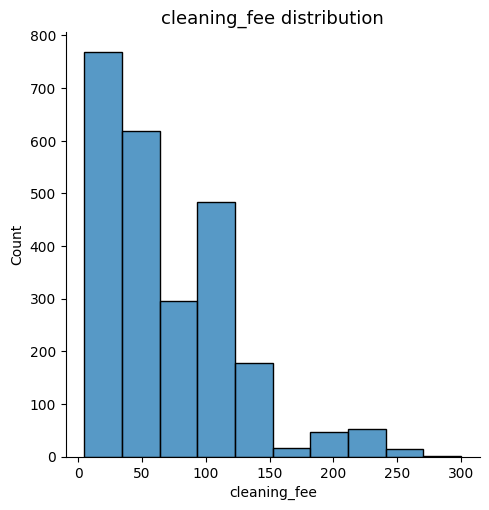

In [68]:
sns.displot(df_bos_lis_c['cleaning_fee'], bins=10)
plt.title('cleaning_fee distribution', size=13)
plt.show()

In [69]:
# filling the null values with the mean 
df_bos_lis_c['cleaning_fee'] = df_bos_lis_c['cleaning_fee'].fillna(df_bos_lis_c['cleaning_fee'].mean())

# checking if it worked
df_bos_lis_c['cleaning_fee'].isnull().sum()

0

#### Dealing with Categorical Features

In [70]:
df_bos_lis_c.select_dtypes(include='object').head()

,market,host_is_superhost,property_type,room_type,bed_type,cancellation_policy
0,Boston,f,House,Entire home/apt,Real Bed,moderate
1,Boston,f,Apartment,Private room,Real Bed,moderate
2,Boston,t,Apartment,Private room,Real Bed,moderate
3,Boston,f,House,Private room,Real Bed,moderate
4,Boston,t,House,Private room,Real Bed,flexible


**market** : I'll just create a 'boston' column that contains 1 for all values in boston

In [71]:
# creates new column based on market column
df_bos_lis_c['boston'] = np.where(df_bos_lis_c['market']=='Boston', 1, 0)
df_bos_lis_c['seattle'] = np.where(df_bos_lis_c['market']=='Seattle', 1, 0)

# drops olde market column
df_bos_lis_c.drop('market', axis=1, inplace=True)

# shows boston column
df_bos_lis_c[['boston', 'seattle']].head()

,boston,seattle
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


**host_is_superhost**: I'll again just create a new column 'superhost' that contains 1 if true else 0

In [72]:
# creates new column superhost based on host_is_superhost column
df_bos_lis_c['superhost'] = np.where(df_bos_lis_c['host_is_superhost']=='t', 1, 0)

# drop the 'host_is_superhost' column
df_bos_lis_c.drop('host_is_superhost', axis=1, inplace=True)

# shows superhost column
df_bos_lis_c['superhost'].head()

0    0
1    0
2    1
3    0
4    1
Name: superhost, dtype: int32

**property_type**: I'll get the dummies for this column

In [73]:
df_bos_lis_c = pd.concat([df_bos_lis_c.drop('property_type',axis=1), pd.get_dummies(df_bos_lis_c.property_type)], axis=1)
df_bos_lis_c.head()


,id,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,number_of_reviews,review_scores_rating,cancellation_policy,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa
0,12147973,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,35.000000,0,NaN,moderate,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3075044,Private room,2,1.0,1.0,1.0,Real Bed,65.0,10.000000,36,94.0,moderate,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,6976,Private room,2,1.0,1.0,1.0,Real Bed,65.0,68.380145,41,98.0,moderate,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1436513,Private room,4,1.0,1.0,2.0,Real Bed,75.0,50.000000,1,100.0,moderate,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,7651065,Private room,2,1.5,1.0,2.0,Real Bed,79.0,15.000000,29,99.0,flexible,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


**room_type**: I'll also just get the dummies for this one

In [74]:
df_bos_lis_c = pd.concat([df_bos_lis_c.drop('room_type',axis=1), pd.get_dummies(df_bos_lis_c.room_type)], axis=1)
df_bos_lis_c.head()

,id,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,number_of_reviews,review_scores_rating,cancellation_policy,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa,Entire home/apt,Private room,Shared room
0,12147973,4,1.5,2.0,3.0,Real Bed,250.0,35.000000,0,NaN,moderate,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,3075044,2,1.0,1.0,1.0,Real Bed,65.0,10.000000,36,94.0,moderate,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,6976,2,1.0,1.0,1.0,Real Bed,65.0,68.380145,41,98.0,moderate,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1436513,4,1.0,1.0,2.0,Real Bed,75.0,50.000000,1,100.0,moderate,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,7651065,2,1.5,1.0,2.0,Real Bed,79.0,15.000000,29,99.0,flexible,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


**bed_type**: I'll also just get the dummies for this one

In [75]:
df_bos_lis_c = pd.concat([df_bos_lis_c.drop('bed_type', axis=1), pd.get_dummies(df_bos_lis_c.bed_type)], axis=1)
df_bos_lis_c.head()

,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,cancellation_policy,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,12147973,4,1.5,2.0,3.0,250.0,35.000000,0,NaN,moderate,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,3075044,2,1.0,1.0,1.0,65.0,10.000000,36,94.0,moderate,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,6976,2,1.0,1.0,1.0,65.0,68.380145,41,98.0,moderate,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1436513,4,1.0,1.0,2.0,75.0,50.000000,1,100.0,moderate,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,7651065,2,1.5,1.0,2.0,79.0,15.000000,29,99.0,flexible,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


**cancellation_policy**: Just the dummies

In [76]:
df_bos_lis_c = pd.concat([df_bos_lis_c.drop('cancellation_policy', axis=1), pd.get_dummies(df_bos_lis_c.cancellation_policy)], axis=1)
df_bos_lis_c.head()

,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30
0,12147973,4,1.5,2.0,3.0,250.0,35.000000,0,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,3075044,2,1.0,1.0,1.0,65.0,10.000000,36,94.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,6976,2,1.0,1.0,1.0,65.0,68.380145,41,98.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,1436513,4,1.0,1.0,2.0,75.0,50.000000,1,100.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,7651065,2,1.5,1.0,2.0,79.0,15.000000,29,99.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


**Rounding the 'cleaning_fee' column**

In [77]:
# applying the round function
df_bos_lis_c['cleaning_fee'] = df_bos_lis_c['cleaning_fee'].round(decimals = 2)

**Creating the boston listings dataset**

In [78]:
boston_listings = df_bos_lis_c
boston_listings.head()

,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30
0,12147973,4,1.5,2.0,3.0,250.0,35.00,0,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,3075044,2,1.0,1.0,1.0,65.0,10.00,36,94.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,6976,2,1.0,1.0,1.0,65.0,68.38,41,98.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,1436513,4,1.0,1.0,2.0,75.0,50.00,1,100.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,7651065,2,1.5,1.0,2.0,79.0,15.00,29,99.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


**Applying the same steps to the Seattle dataframe**

In [79]:
# creating copy of the dataset
df_sea_lis_c = df_sea_lis.copy()

# selecting only necessary columns
df_sea_lis_c = df_sea_lis_c[['id', 'market', 'host_is_superhost', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                             'bed_type', 'price', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy']]

# applying the functions
df_sea_lis_c.price = df_sea_lis_c.price.apply(lambda x: x.replace('$', ''))
df_sea_lis_c.price = df_sea_lis_c.price.apply(lambda x: x.replace(',', '.'))
df_sea_lis_c.price = df_sea_lis_c.price.apply(lambda x: x[:-3])

df_sea_lis_c.cleaning_fee = df_sea_lis_c.cleaning_fee.apply(lambda x: str(x) if x else None)
df_sea_lis_c.cleaning_fee = df_sea_lis_c.cleaning_fee.apply(lambda x: x.replace('$', '') if x else None)
df_sea_lis_c.cleaning_fee = df_sea_lis_c.cleaning_fee.apply(lambda x: x.replace(',', '.') if x else None)
df_sea_lis_c.cleaning_fee = df_sea_lis_c.cleaning_fee.apply(lambda x: x[:-3] if x else None)
df_sea_lis_c.cleaning_fee = df_sea_lis_c.cleaning_fee.apply(lambda x: np.nan if x=='' else x)

# Changing the datatypes 
df_sea_lis_c[['price', 'cleaning_fee']] = df_sea_lis_c[['price', 'cleaning_fee']].astype('float64')

# filling market nulls
df_sea_lis_c.market = df_sea_lis_c.market.fillna('Boston')

# filling property_type nulls
df_sea_lis_c.property_type = df_sea_lis_c.property_type.fillna(df_sea_lis_c.property_type.mode().values[0])

# filling bathrooms null values with the mode
df_sea_lis_c['bathrooms'] = df_sea_lis_c['bathrooms'].fillna(df_sea_lis_c['bathrooms'].mode().values[0])

# filling bedrooms null values with the mode
df_sea_lis_c['bedrooms'] = df_sea_lis_c['bedrooms'].fillna(df_sea_lis_c['bedrooms'].mode().values[0])

# filling beds null values with the mode
df_sea_lis_c['beds'] = df_sea_lis_c['beds'].fillna(df_sea_lis_c['beds'].mode().values[0])

# filling the null values with the mean 
df_sea_lis_c['cleaning_fee'] = df_sea_lis_c['cleaning_fee'].fillna(df_sea_lis_c['cleaning_fee'].mean())

# creates new column based on market column
df_sea_lis_c['boston'] = np.where(df_sea_lis_c['market']=='Boston', 1, 0)
df_sea_lis_c['seattle'] = np.where(df_sea_lis_c['market']=='Seattle', 1, 0)

# drops olde market column
df_sea_lis_c.drop('market', axis=1, inplace=True)

# creates new column superhost based on host_is_superhost column
df_sea_lis_c['superhost'] = np.where(df_sea_lis_c['host_is_superhost']=='t', 1, 0)

# drop the 'host_is_superhost' column
df_sea_lis_c.drop('host_is_superhost', axis=1, inplace=True)

# getting the dummies
df_sea_lis_c = pd.concat([df_sea_lis_c.drop('property_type',axis=1), pd.get_dummies(df_sea_lis_c.property_type)], axis=1)
df_sea_lis_c = pd.concat([df_sea_lis_c.drop('room_type',axis=1), pd.get_dummies(df_sea_lis_c.room_type)], axis=1)
df_sea_lis_c = pd.concat([df_sea_lis_c.drop('bed_type', axis=1), pd.get_dummies(df_sea_lis_c.bed_type)], axis=1)
df_sea_lis_c = pd.concat([df_sea_lis_c.drop('cancellation_policy', axis=1), pd.get_dummies(df_sea_lis_c.cancellation_policy)], axis=1)

# applying the round function
df_sea_lis_c['cleaning_fee'] = df_sea_lis_c['cleaning_fee'].round(decimals = 2)

# creating the seattle listings dataset
seattle_listings = df_sea_lis_c

In [80]:
# Combining the datasets
display(seattle_listings.head(1), boston_listings.head(1))

,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict
0,241032,4,1.0,1.0,1.0,85.0,61.71,207,95.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30
0,12147973,4,1.5,2.0,3.0,250.0,35.0,0,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [81]:
listings = pd.concat([seattle_listings, boston_listings])
listings.head()

,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,Entire Floor,Guesthouse,Villa,super_strict_30
0,241032,4,1.0,1.0,1.0,85.0,61.71,207,95.0,0,1,0,1,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,1,0,0,0,0,0,0,1,0,1,0,NaN,NaN,NaN,NaN
1,953595,4,1.0,1.0,1.0,150.0,40.00,43,96.0,0,1,1,1,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,1,NaN,NaN,NaN,NaN
2,3308979,11,4.5,5.0,7.0,975.0,300.00,20,97.0,0,1,0,0,0,0,0.0,0.0,0,0.0,0,0,1,0,0,0.0,0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,1,NaN,NaN,NaN,NaN
3,7421966,3,1.0,0.0,2.0,100.0,61.71,0,NaN,0,1,0,1,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,1,0,0,0,0,0,0,1,1,0,0,NaN,NaN,NaN,NaN
4,278830,6,2.0,3.0,3.0,450.0,125.00,38,92.0,0,1,0,0,0,0,0.0,0.0,0,0.0,0,0,1,0,0,0.0,0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,1,NaN,NaN,NaN,NaN


As seen, there were a few columns in the boston dataset there weren't in the seattle one. As a consequence, those columns are completely NaN in the final dataset. Thankfully those are all binary columns, so I can just fill the up with 0.

**Fixing the Listings dataset**

In [82]:
listings.isnull().sum()

id                         0
accommodates               0
bathrooms                  0
bedrooms                   0
beds                       0
price                      0
cleaning_fee               0
number_of_reviews          0
review_scores_rating    1460
boston                     0
seattle                    0
superhost                  0
Apartment                  0
Bed & Breakfast            0
Boat                       0
Bungalow                3585
Cabin                   3585
Camper/RV                  0
Chalet                  3585
Condominium                0
Dorm                       0
House                      0
Loft                       0
Other                      0
Tent                    3585
Townhouse                  0
Treehouse               3585
Yurt                    3585
Entire home/apt            0
Private room               0
Shared room                0
Airbed                     0
Couch                      0
Futon                      0
Pull-out Sofa 

In [83]:
listings[['Bungalow', 'Cabin', 'Chalet', 'Tent', 'Treehouse', 'Yurt', 'Entire Floor', 
          'Guesthouse', 'Villa', 'super_strict_30']] = listings[['Bungalow', 'Cabin', 'Chalet', 'Tent', 'Treehouse', 
                                                                 'Yurt', 'Entire Floor', 'Guesthouse', 'Villa', 'super_strict_30']].fillna(0)

listings.isnull().sum()

id                         0
accommodates               0
bathrooms                  0
bedrooms                   0
beds                       0
price                      0
cleaning_fee               0
number_of_reviews          0
review_scores_rating    1460
boston                     0
seattle                    0
superhost                  0
Apartment                  0
Bed & Breakfast            0
Boat                       0
Bungalow                   0
Cabin                      0
Camper/RV                  0
Chalet                     0
Condominium                0
Dorm                       0
House                      0
Loft                       0
Other                      0
Tent                       0
Townhouse                  0
Treehouse                  0
Yurt                       0
Entire home/apt            0
Private room               0
Shared room                0
Airbed                     0
Couch                      0
Futon                      0
Pull-out Sofa 

In [84]:
#  Fixing the review_scores_rating column
listings[(listings.review_scores_rating.isnull() == True) & (listings.number_of_reviews != 0)]

,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,Entire Floor,Guesthouse,Villa,super_strict_30
204,9028447,2,1.0,1.0,1.0,100.0,61.71,1,NaN,0,1,0,1,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,1,0,0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,0.0
283,5336585,2,1.0,0.0,1.0,75.0,61.71,1,NaN,0,1,0,0,0,0,0.0,0.0,0,0.0,0,0,0,1,0,0.0,0,0.0,0.0,1,0,0,0,0,0,0,1,1,0,0,0.0,0.0,0.0,0.0
361,8207848,4,1.0,2.0,2.0,259.0,155.00,1,NaN,0,1,0,1,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0
482,186328,6,3.0,3.0,2.0,250.0,100.00,1,NaN,0,1,0,0,0,0,0.0,0.0,0,0.0,0,0,1,0,0,0.0,0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0
527,790860,7,1.0,3.0,1.0,450.0,250.00,1,NaN,0,1,0,1,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,1,0,0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,13295386,2,1.0,1.0,1.0,62.0,10.00,1,NaN,1,0,0,1,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0,1,0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,0.0
3442,14484865,2,1.0,1.0,1.0,110.0,68.38,1,NaN,1,0,0,1,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0,1,0,0,0,0,0,1,1,0,0,0.0,0.0,0.0,0.0
3460,13550412,2,0.5,1.0,1.0,40.0,50.00,2,NaN,1,0,0,1,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0
3464,14055624,1,1.5,1.0,1.0,58.0,50.00,1,NaN,1,0,0,1,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0


There are 2 different ocasions where the review_scores_rating is NaN

1. The number of reviews is 0
- In this case, It makes sense to keep the rows and create a new column telling the the value is null
2. The number of reviews is greater then 0
- In this case it doesn't make sense, so I'll just drop these rows

In [85]:
# dropping rows with reviews and without review score
listings = listings.drop(listings[(listings['review_scores_rating'].isnull()) & (listings['number_of_reviews']>0)].index)

# checking if worked
listings[(listings['review_scores_rating'].isnull()) & (listings['number_of_reviews']>0)]

,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,Entire Floor,Guesthouse,Villa,super_strict_30


In [86]:
# Creating a column to showcase were the reviews are missing
listings['missing_review'] = np.where(listings['review_scores_rating'].isnull(), 1, 0)
listings[['missing_review', 'review_scores_rating']][listings['missing_review']==1].head()

,missing_review,review_scores_rating
3,1,NaN
18,1,NaN
23,1,NaN
26,1,NaN
46,1,NaN


In [87]:
# Filling review_scores_rating missing values with 0
listings['review_scores_rating'] = listings['review_scores_rating'].fillna(0)
listings.isnull().sum()

id                      0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
price                   0
cleaning_fee            0
number_of_reviews       0
review_scores_rating    0
boston                  0
seattle                 0
superhost               0
Apartment               0
Bed & Breakfast         0
Boat                    0
Bungalow                0
Cabin                   0
Camper/RV               0
Chalet                  0
Condominium             0
Dorm                    0
House                   0
Loft                    0
Other                   0
Tent                    0
Townhouse               0
Treehouse               0
Yurt                    0
Entire home/apt         0
Private room            0
Shared room             0
Airbed                  0
Couch                   0
Futon                   0
Pull-out Sofa           0
Real Bed                0
flexible                0
moderate                0
strict      

In [88]:
# Combining all three datasets
cal_rev = pd.merge(calendar, reviews, left_on='listing_id', right_on='listing_id', how='left')
cal_rev.head()

,listing_id,occupation_rate,review_negative,review_positive,review_unknwon
0,3353,0.317808,0.0,27.0,7.0
1,5506,0.057534,0.0,30.0,6.0
2,6695,0.112329,0.0,40.0,7.0
3,6976,0.126027,1.0,36.0,4.0
4,8792,0.320548,0.0,17.0,1.0


In [89]:
df = pd.merge(cal_rev, listings, left_on='listing_id', right_on='id', how='left')
df.head()

,listing_id,occupation_rate,review_negative,review_positive,review_unknwon,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,Entire Floor,Guesthouse,Villa,super_strict_30,missing_review
0,3353,0.317808,0.0,27.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5506,0.057534,0.0,30.0,6.0,5506.0,2.0,1.0,1.0,1.0,145.0,40.00,36.0,91.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,6695,0.112329,0.0,40.0,7.0,6695.0,4.0,1.0,1.0,2.0,195.0,70.00,47.0,95.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,6976,0.126027,1.0,36.0,4.0,6976.0,2.0,1.0,1.0,1.0,65.0,68.38,41.0,98.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8792,0.320548,0.0,17.0,1.0,8792.0,3.0,1.0,1.0,1.0,154.0,250.00,18.0,91.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
df.isnull().sum()


listing_id                 0
occupation_rate            0
review_negative         1383
review_positive         1383
review_unknwon          1383
id                       150
accommodates             150
bathrooms                150
bedrooms                 150
beds                     150
price                    150
cleaning_fee             150
number_of_reviews        150
review_scores_rating     150
boston                   150
seattle                  150
superhost                150
Apartment                150
Bed & Breakfast          150
Boat                     150
Bungalow                 150
Cabin                    150
Camper/RV                150
Chalet                   150
Condominium              150
Dorm                     150
House                    150
Loft                     150
Other                    150
Tent                     150
Townhouse                150
Treehouse                150
Yurt                     150
Entire home/apt          150
Private room  

**Cleaning the final dataframe**

**Problem 1**: There are a few (150) listings that weren't in the listings dataset

In [91]:
df[df['id'].isnull()]

,listing_id,occupation_rate,review_negative,review_positive,review_unknwon,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,Entire Floor,Guesthouse,Villa,super_strict_30,missing_review
0,3353,0.317808,0.0,27.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,9858,0.002740,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,22212,0.046575,2.0,13.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,169938,0.605479,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,1044307,0.008219,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,9217446,0.838356,0.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7022,9238818,0.000000,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7071,9352778,0.208219,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7120,9457328,0.052055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**My solution**: I'll need to drop these rows since it will be impossible to fill the these null values

In [92]:
df = df.drop(df[df['id'].isnull()].index)
df[df['id'].isnull()]

,listing_id,occupation_rate,review_negative,review_positive,review_unknwon,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,Entire Floor,Guesthouse,Villa,super_strict_30,missing_review


**Problem 2**: All the 1374 listings that doesn't have any reviews have null is the number of positive and negative reviews

In [93]:
df[(df['review_negative'].isnull()) & (df['review_positive'].isnull()) & (df['review_unknwon'].isnull())].iloc[:, [2,3,4,12]]


,review_negative,review_positive,review_unknwon,number_of_reviews
13,NaN,NaN,NaN,0.0
18,NaN,NaN,NaN,0.0
33,NaN,NaN,NaN,0.0
50,NaN,NaN,NaN,0.0
51,NaN,NaN,NaN,0.0
...,...,...,...,...
7398,NaN,NaN,NaN,0.0
7399,NaN,NaN,NaN,0.0
7400,NaN,NaN,NaN,0.0
7401,NaN,NaN,NaN,0.0


**my solution**: I'll just add 0 for all those values

In [94]:
df = df.fillna(0)
df.isnull().sum().sum()

0

**Fixing the final df datatypes**

In [95]:
# There are a bunch of columns that should be binary and are as float64 dataypes. I'll just change there datatypes to uint64
df.head()

,listing_id,occupation_rate,review_negative,review_positive,review_unknwon,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,Entire Floor,Guesthouse,Villa,super_strict_30,missing_review
1,5506,0.057534,0.0,30.0,6.0,5506.0,2.0,1.0,1.0,1.0,145.0,40.00,36.0,91.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,6695,0.112329,0.0,40.0,7.0,6695.0,4.0,1.0,1.0,2.0,195.0,70.00,47.0,95.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,6976,0.126027,1.0,36.0,4.0,6976.0,2.0,1.0,1.0,1.0,65.0,68.38,41.0,98.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8792,0.320548,0.0,17.0,1.0,8792.0,3.0,1.0,1.0,1.0,154.0,250.00,18.0,91.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9273,0.002740,0.0,13.0,0.0,9273.0,4.0,2.0,2.0,2.0,225.0,80.00,13.0,100.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:
# changing the first columns datatypes
df.iloc[:, [2, 3, 4, 5, 6, 9, 12]] = df.iloc[:, [2, 3, 4, 5, 6, 9, 12]].astype('uint64')

# changing the dataype of the rest of the columns
df.iloc[:, 14:] = df.iloc[:, 14:].astype('uint64')

# 
df.head()

,listing_id,occupation_rate,review_negative,review_positive,review_unknwon,id,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,Entire Floor,Guesthouse,Villa,super_strict_30,missing_review
1,5506,0.057534,0,30,6,5506,2,1.0,1.0,1,145.0,40.00,36,91.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,6695,0.112329,0,40,7,6695,4,1.0,1.0,2,195.0,70.00,47,95.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,6976,0.126027,1,36,4,6976,2,1.0,1.0,1,65.0,68.38,41,98.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,8792,0.320548,0,17,1,8792,3,1.0,1.0,1,154.0,250.00,18,91.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
5,9273,0.002740,0,13,0,9273,4,2.0,2.0,2,225.0,80.00,13,100.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [97]:
# Dropping the unnecessary columns
# In this case, the listing_id and the id columns because they won't be useful for the modeling:
df.drop(['listing_id', 'id'], axis=1, inplace=True)
df.head()

,occupation_rate,review_negative,review_positive,review_unknwon,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,Entire Floor,Guesthouse,Villa,super_strict_30,missing_review
1,0.057534,0,30,6,2,1.0,1.0,1,145.0,40.00,36,91.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0.112329,0,40,7,4,1.0,1.0,2,195.0,70.00,47,95.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.126027,1,36,4,2,1.0,1.0,1,65.0,68.38,41,98.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,0.320548,0,17,1,3,1.0,1.0,1,154.0,250.00,18,91.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
5,0.002740,0,13,0,4,2.0,2.0,2,225.0,80.00,13,100.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


## Data Analysis

In order to facilitate my analysis, I'll need to undo some of the changes I previously did. For that, I'll just create a new dataset.

In [98]:
# creating new analysis df
analysis_df = df.copy() 

# making a few changes to facilitate the analysis 

# creating categorical city column
analysis_df['city'] = np.where(analysis_df.boston==1, 'boston', 'seattle')


# creating categorical occupation column
def classify_occupation(value: float) -> str:
    """Function to classify the occupation rate into categories, such as: 
    - always occupied
    - often occupied 
    - sometimes occupied 
    - rarely occupied

    Args:
        value (float): the occupation rate of the propery

    Returns:
        str: the category in which the property fits
    """
    if value >= 0.95:
        return 'always occupied'
    if value >= 0.75:
        return 'often occupied'
    if value >= 0.50:
        return 'sometimes occupied'
    if value >= 0.15:
        return 'rarely occupied'
    return 'almost never occupied'



# creating categorical listing quality function
def classify_listing_quality(value: float) -> str:
    """Function to classify the listing quality into categories, such as:
    - amazing
    - very good
    - decent 
    - bad

    Args:
        value (float): Reviews rating for that listing

    Returns:
        str: category in which the property fits
    """
    if value >= 0.75:
        return 'good'
    return 'bad'


# applying functions to the dataset
analysis_df['occupation'] = analysis_df['occupation_rate'].apply(classify_occupation)
analysis_df['quality'] = analysis_df['review_scores_rating'].apply(classify_listing_quality)

# removing outliers
analysis_df = analysis_df.drop(analysis_df[analysis_df['occupation_rate']>1].index)

analysis_df.head()

,occupation_rate,review_negative,review_positive,review_unknwon,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,Entire Floor,Guesthouse,Villa,super_strict_30,missing_review,city,occupation,quality
1,0.057534,0,30,6,2,1.0,1.0,1,145.0,40.00,36,91.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,boston,almost never occupied,good
2,0.112329,0,40,7,4,1.0,1.0,2,195.0,70.00,47,95.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,boston,almost never occupied,good
3,0.126027,1,36,4,2,1.0,1.0,1,65.0,68.38,41,98.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,boston,almost never occupied,good
4,0.320548,0,17,1,3,1.0,1.0,1,154.0,250.00,18,91.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,boston,rarely occupied,good
5,0.002740,0,13,0,4,2.0,2.0,2,225.0,80.00,13,100.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,boston,almost never occupied,good


#### Question 1:
**Which city has the best listings? Which one has more expensive ones? Is there a connection in that?**

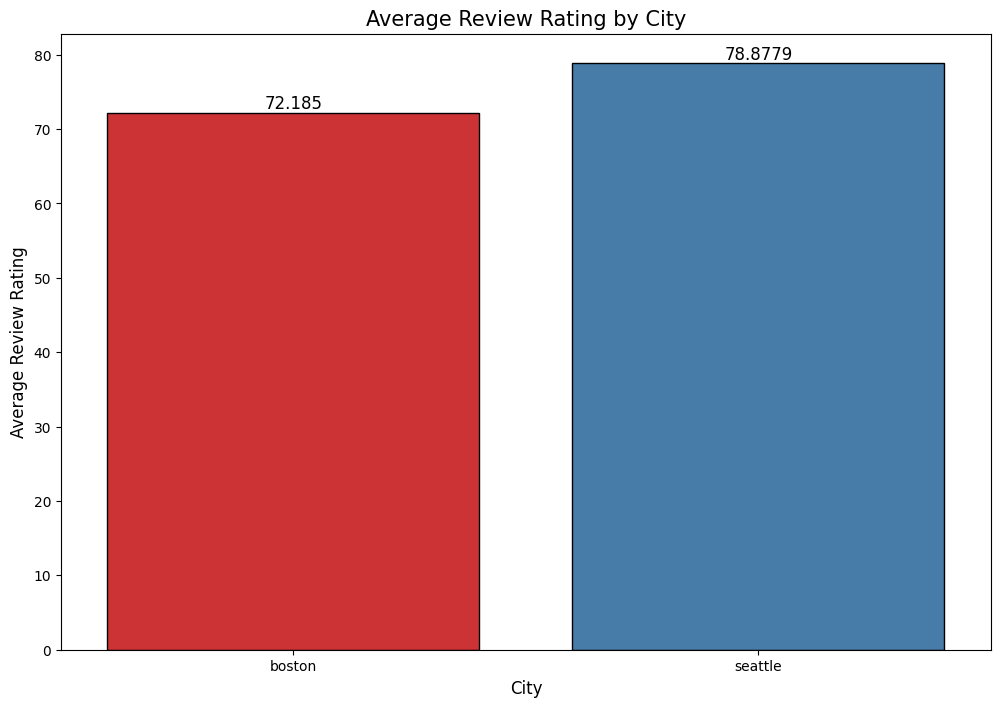

In [99]:
# grouping data
df1 = analysis_df.groupby('city')['review_scores_rating'].mean().to_frame().reset_index()

# creating figure
plt.figure(figsize=(12,8))

# creating bar plot
ax = sns.barplot(x='city', y='review_scores_rating', data=df1, palette="Set1", edgecolor='black')

# personalizing bar plot
ax.bar_label(ax.containers[0], size=12);
ax.set_title('Average Review Rating by City', size=15)
ax.set_ylabel('Average Review Rating', size=12)
ax.set_xlabel('City', size=12)

# showing bar plot
plt.show()

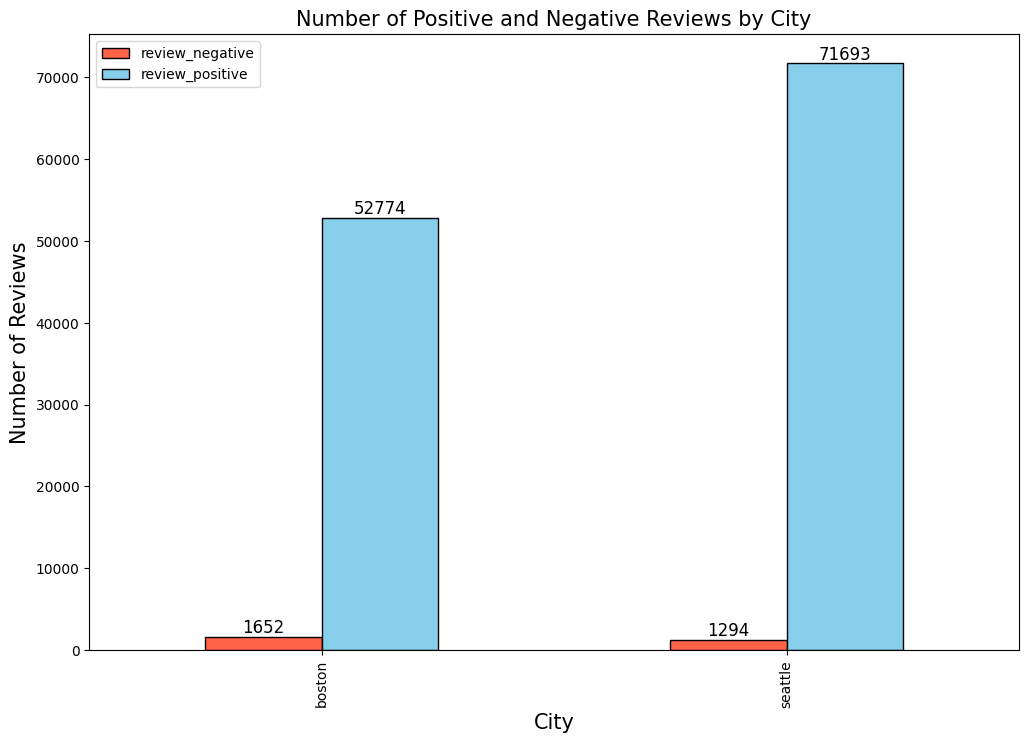

In [100]:
# grouping data
df2 = analysis_df.groupby('city')[['review_negative', 'review_positive']].sum()

# building plot
ax = df2.plot(kind='bar', stacked=False, color=['tomato', 'skyblue'], figsize=(12,8), edgecolor='black')

# personalizing plot
ax.set_title('Number of Positive and Negative Reviews by City', size=15)
ax.set_xlabel('City', size=15)
ax.set_ylabel('Number of Reviews', size=15)

for i in ax.containers:
    ax.bar_label(i, size=12)

plt.show()

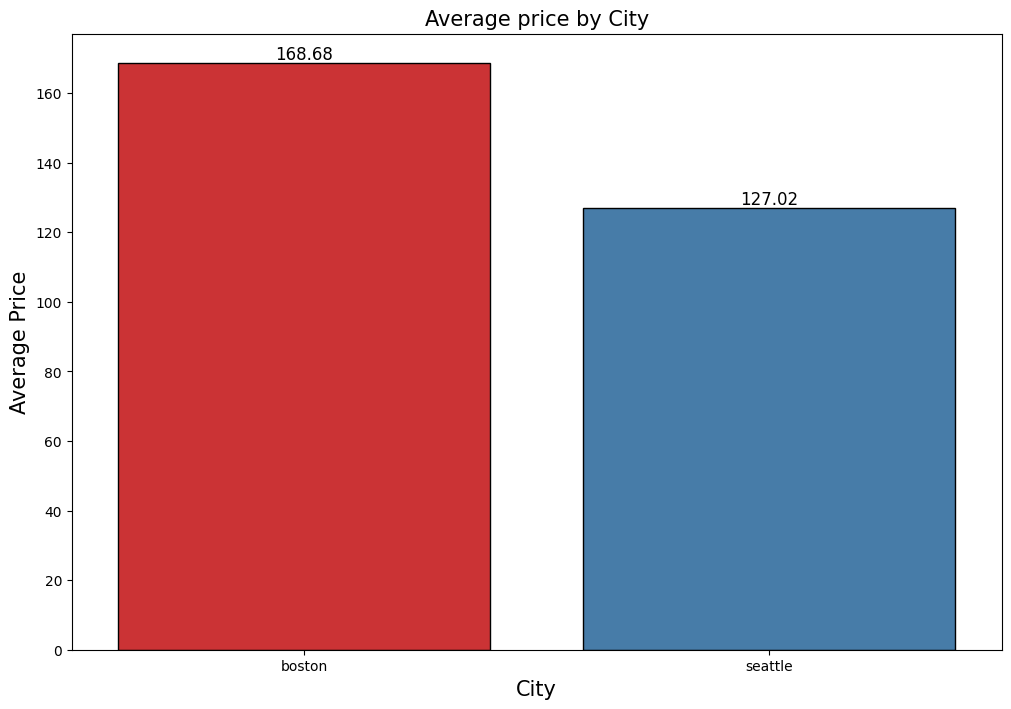

In [101]:
# grouping data
df3 = analysis_df.groupby('city')['price'].mean().to_frame().reset_index()
df3['price'] = df3['price'].apply(lambda x: round(x, 2))

# creating figure
plt.figure(figsize=(12,8))

# building plot
ax = sns.barplot(x='city', y='price', data=df3, palette='Set1', edgecolor='black')

# personalizing plot
ax.set_title('Average price by City', size=15)
ax.set_ylabel('Average Price', size=15)
ax.set_xlabel('City', size=15)
ax.bar_label(ax.containers[0], size=12)

# showing plot
plt.show()

**Results:**
- After looking at the data, it got clear that the city of **Seattle has the best listings**. It not only has a **higher average review rating**, 78.8 compared with 72.1 in Boston, but it also has a much higher positive/negative review ratio, 55.4 compared with 31.9 in Boston. In addition to that, **Boston has a much higher average price**, 168.70 dollars compared with 127.02 dollars in Seattle. That means that more expensive houses are not necessarily better.
- In my opinion, when people get into more expensive houses they tend to be more demanding. In that case, sometimes it leads to people geting disapointed with the listing, leading to negative reviews.

#### Question 2:
**What's the connection between price and occupation rate? Where does the quality of the listing fits in that?**

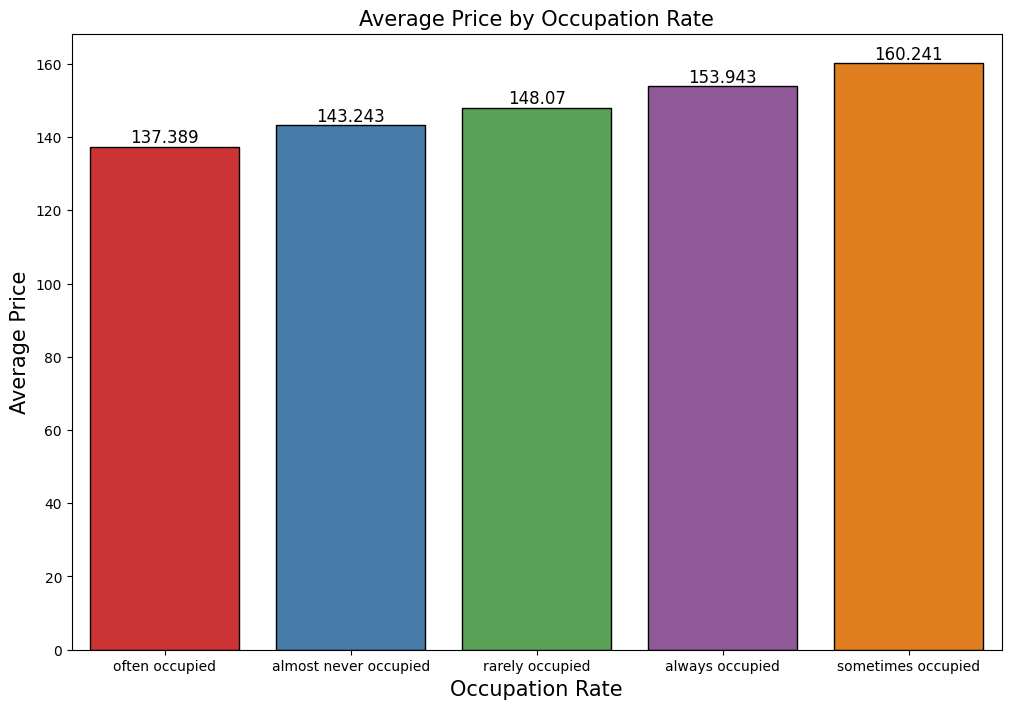

In [102]:
# grouping data
df4 = analysis_df.groupby('occupation')['price'].mean().to_frame().reset_index().sort_values(by='price')

# plotting 
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df4, x='occupation', y='price', edgecolor='black', palette='Set1')
ax.set_xlabel('Occupation Rate', size=15)
ax.set_ylabel('Average Price', size=15)
ax.set_title('Average Price by Occupation Rate', size=15)

for i in ax.containers:
    ax.bar_label(i, size=12)
plt.show()

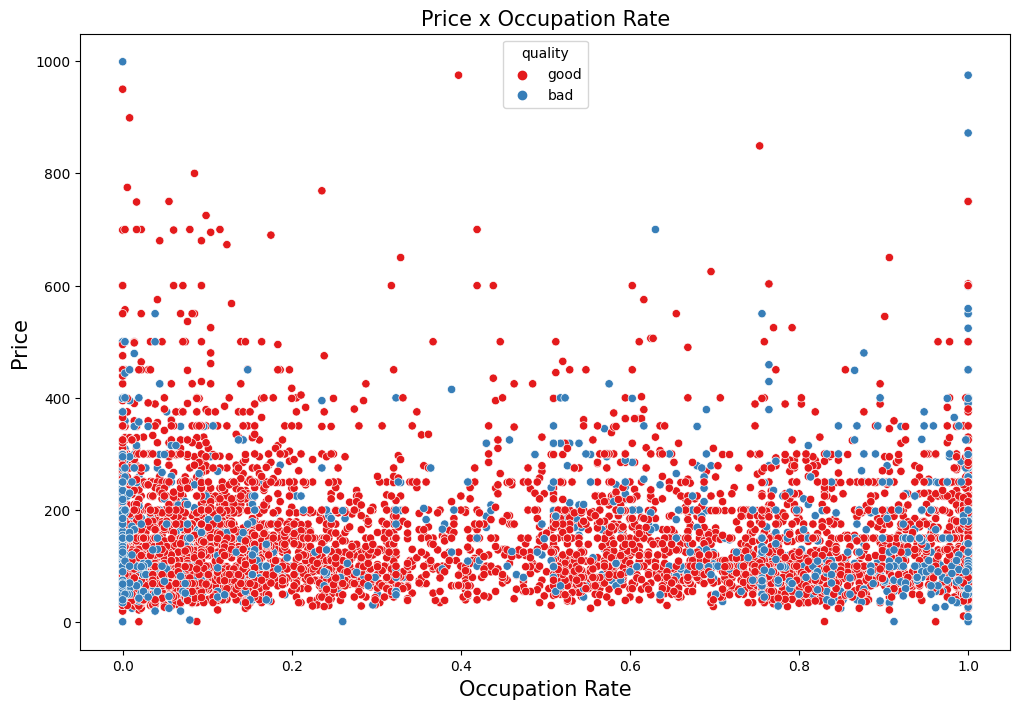

In [103]:
# Plotting the relationshiop between price and occupation_rate
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=analysis_df, y='price', x='occupation_rate', hue='quality', palette='Set1')
ax.set_xlabel('Occupation Rate', size=15)
ax.set_ylabel('Price', size=15)
ax.set_title('Price x Occupation Rate', size=15)
plt.show()

**Results:**
- The correlation between price and occupation rate is not very strong. That means that lowering the price of your house won't necessarily call for more attention.
- One interesting finding is that expensive houses (above 400 dollars) tend to have either a very high or very low occupation rate.


#### Question 3:
**What are the main features that influences the review rates? What about the prices?**

In order to answer that question, I'll need to build some machine learning models. That leads us to the next section:

## Data Modelling

### Predicting the review scores:

In order to better predict the review scores, I'll first drop the 0 filled review_scores rating rows. That way our model won't be biased.

In [104]:
# dropping rows
df_review = df.drop(df[df['review_scores_rating']==0].index)

# checking dataframe
df_review.head()

,occupation_rate,review_negative,review_positive,review_unknwon,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,Entire Floor,Guesthouse,Villa,super_strict_30,missing_review
1,0.057534,0,30,6,2,1.0,1.0,1,145.0,40.00,36,91.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0.112329,0,40,7,4,1.0,1.0,2,195.0,70.00,47,95.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.126027,1,36,4,2,1.0,1.0,1,65.0,68.38,41,98.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,0.320548,0,17,1,3,1.0,1.0,1,154.0,250.00,18,91.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
5,0.002740,0,13,0,4,2.0,2.0,2,225.0,80.00,13,100.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


##### Splitting into train and test datasets

In [105]:
# regressors
X = df_review.drop(columns=['review_scores_rating', 'missing_review'], axis=1)

# target
y = df_review['review_scores_rating']

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

X_train.shape, X_test.shape

((4115, 45), (1764, 45))

In [106]:
# Function to automate model creation, training, and evaluation
def build_model(ml_model, X_train, X_test, y_train, y_test, evaluation_methods: list):
    """Function to automate the model creation, training, prediction, and evaluation.

    Args:
        ml_model (object): Algorithm that will be built
        X_train (Array): training regressors
        X_test (Array): testing regressors
        y_train (Array): training target
        y_test (Array): testing target
        evaluation_methods (list): evaluation methods that will be used to see the model performace
    """
    # creates model
    model = ml_model
    
    # trains model
    model.fit(X_train, y_train)
    
    # predicts model
    y_pred = model.predict(X_test)
    
    # evaluates model
    evaluation_results = []
    
    for method in evaluation_methods:
        evaluation_results.append(method(y_test, y_pred))
        
    # prints results
    for method, result in zip(evaluation_methods, evaluation_results):
        print(f'{method}: {result}')

**Regression Models**

In [108]:
# Building Linear Regression Model
build_model(LinearRegression(), X_train, X_test, y_train, y_test, [r2_score, mean_squared_error])

<function r2_score at 0x0000023CBD162550>: 0.12956267158317547
<function mean_squared_error at 0x0000023CBD162280>: 63.87400659908499


In [113]:
#Building Ridge Regression Model
build_model(RidgeCV(), X_train, X_test, y_train, y_test, [r2_score, mean_squared_error])

<function r2_score at 0x0000023CBD162550>: 0.129490289835125
<function mean_squared_error at 0x0000023CBD162280>: 63.87931808114313


In [114]:
# Building Lasso Regression Model
build_model(LassoCV(), X_train, X_test, y_train, y_test, [r2_score, mean_squared_error])

<function r2_score at 0x0000023CBD162550>: 0.127903629648506
<function mean_squared_error at 0x0000023CBD162280>: 63.99574960346186


In [115]:
# Building Elastic Net Model
build_model(ElasticNetCV(), X_train, X_test, y_train, y_test, [r2_score, mean_squared_error])


<function r2_score at 0x0000023CBD162550>: 0.12433835897475365
<function mean_squared_error at 0x0000023CBD162280>: 64.25737455348207


In [116]:
#Building Random Forest Model
build_model(RandomForestRegressor(), X_train, X_test, y_train, y_test, [r2_score, mean_squared_error])

<function r2_score at 0x0000023CBD162550>: 0.22002962546600546
<function mean_squared_error at 0x0000023CBD162280>: 57.23540480586793


*Since the Random Forest was the best model, let's build it again and tune the hyperparameters:*

In [118]:
# Before hyperparameter tuning:
# building model 
rf = RandomForestRegressor()

# training model
rf.fit(X_train, y_train)

# predicting with the model
y_pred = rf.predict(X_test)

# evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score: {r2},\nMean Squared Error: {mse}')

R2 Score: 0.20715394609609128,
Mean Squared Error: 58.18024161627615


In [119]:
## After hyperparameter tuning:
## Using RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [120]:
# instantiate model
rf = RandomForestRegressor()

# searching for parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# train model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [121]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [122]:
# Creating the tuned model
# instantiating the model
tuned_rf = rf_random.best_estimator_

# training the model
tuned_rf.fit(X_train, y_train)

# predicting with the model
y_pred_tuned = tuned_rf.predict(X_test)

# evaluating the model
r2 = r2_score(y_test, y_pred_tuned)
mse = mean_squared_error(y_test, y_pred_tuned)

print(f'R2 Score: {r2},\nMean Squared Error: {mse}')

R2 Score: 0.21376794373474517,
Mean Squared Error: 57.69489647421279


That model isn't much better, but it has improved. Let's check the features importances:

In [123]:
feature_importances = pd.DataFrame(tuned_rf.feature_importances_, index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
price,0.127477
occupation_rate,0.121772
review_positive,0.105119
number_of_reviews,0.082921
cleaning_fee,0.079388
superhost,0.065371
review_unknwon,0.060146
review_negative,0.053708
accommodates,0.049049
bathrooms,0.028785


**Results:**
- The most important features when predicting an Airbnb listing review score is the price followed by the occupation rate and the number of good and bad reviews. That actually makes a lot of sense.
*People will evaluate your house based on the price you put on it. If you charge too much, people will probably be disappointed and review it poorly.*
- Other important indicator is the cleaning fee.
*Apperently people dont' like to spend a lot when it's time to clean. Quite interesting.*

##### Predicting the Price

In [124]:
df.head()


,occupation_rate,review_negative,review_positive,review_unknwon,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,boston,seattle,superhost,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,Entire Floor,Guesthouse,Villa,super_strict_30,missing_review
1,0.057534,0,30,6,2,1.0,1.0,1,145.0,40.00,36,91.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0.112329,0,40,7,4,1.0,1.0,2,195.0,70.00,47,95.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.126027,1,36,4,2,1.0,1.0,1,65.0,68.38,41,98.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,0.320548,0,17,1,3,1.0,1.0,1,154.0,250.00,18,91.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
5,0.002740,0,13,0,4,2.0,2.0,2,225.0,80.00,13,100.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [125]:
# Let's separate the training and testing datasets
# regressors
X = df.drop(['price'], axis=1)
y = df['price']

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(5077, 46)
(2176, 46)


**Let's build the models again:**

In [126]:
# Linear Regression
build_model(LinearRegression(), X_train, X_test, y_train, y_test, [r2_score, mean_squared_error])

<function r2_score at 0x0000023CBD162550>: 0.5278208336284256
<function mean_squared_error at 0x0000023CBD162280>: 5117.166462028752


In [127]:
# Lasso Regression
build_model(LassoCV(), X_train, X_test, y_train, y_test, [r2_score, mean_squared_error])

<function r2_score at 0x0000023CBD162550>: 0.5096782825505184
<function mean_squared_error at 0x0000023CBD162280>: 5313.783467867701


In [128]:
# Ridge Regression
build_model(RidgeCV(), X_train, X_test, y_train, y_test, [r2_score, mean_squared_error])

<function r2_score at 0x0000023CBD162550>: 0.5295045654821298
<function mean_squared_error at 0x0000023CBD162280>: 5098.919286408885


In [129]:
# ElasticNet
build_model(ElasticNetCV(), X_train, X_test, y_train, y_test, [r2_score, mean_squared_error])

<function r2_score at 0x0000023CBD162550>: 0.39012731933829337
<function mean_squared_error at 0x0000023CBD162280>: 6609.3979782533925


In [130]:
# Using the previously created function
build_model(RandomForestRegressor(), X_train, X_test, y_train, y_test, [r2_score, mean_squared_error])

<function r2_score at 0x0000023CBD162550>: 0.5556381671695405
<function mean_squared_error at 0x0000023CBD162280>: 4815.700543162598


Once again, the Random Forest Model was the best. Let's build it again and tune it!

In [131]:
# Before hyperparameter tuning
# building model 
rf_price = RandomForestRegressor()

# training model
rf_price.fit(X_train, y_train)

# predicting with the model
y_pred = rf_price.predict(X_test)

# evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score: {r2},\nMean Squared Error: {mse}')

R2 Score: 0.5547558610471187,
Mean Squared Error: 4825.262395146865


In [132]:
# After hyperparameter tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [133]:
# instantiate model
rf_price_tuned = RandomForestRegressor()

# searching for parameters
rf_price_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# train model
rf_price_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [134]:
# instantiating the model
tuned_rf = rf_random.best_estimator_

# training the model
tuned_rf.fit(X_train, y_train)

# predicting with the model
y_pred_tuned = tuned_rf.predict(X_test)

# evaluating the model
r2 = r2_score(y_test, y_pred_tuned)
mse = mean_squared_error(y_test, y_pred_tuned)

print(f'R2 Score: {r2},\nMean Squared Error: {mse}')

R2 Score: 0.5799737263339682,
Mean Squared Error: 4551.967799196234


In [135]:
feature_importances = pd.DataFrame(tuned_rf.feature_importances_, index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
cleaning_fee,1.410441e-01
bedrooms,1.344162e-01
accommodates,1.073309e-01
Entire home/apt,8.700314e-02
bathrooms,8.456448e-02
beds,6.326490e-02
Private room,6.194079e-02
occupation_rate,5.156142e-02
seattle,3.230367e-02
boston,3.150550e-02


**Results:**
The most important features when predicting the price of a listing are:
1. The cleaning fee: When it's very expensive to clean a house, the house must be very expensive as well
2. The number of bedrooms: More bedrooms -> bigger house -> more expensive house. Makes Sense.
3. The number of people it accommodates: More people -> more bedrooms -> bigger house -> more expensive house. Makes Sense.

## Conclusion & Evaluation

**Which city has the best listings? Which one has more expensive ones? Is there a conection in that?**

- After looking at the data, it got clear that the city of Seattle has the best listings. It not only has a higher average review rating, 78.8 compared with 72.1 in Boston, but it also has a much higher positive/negative review ratio, 55.4 compared with 31.9 in Boston. In addition to that, Boston has a much higher average price, 168.70 dollars compared with 127.02 dollars in Seattle. That means that more expensive houses are not necessarily better.
- In my opinion, when people get into more expensive houses they tend to be more demanding. In that case, sometimes it leads to people geting disapointed with the listing, leading to negative reviews.

**What's the connection between price and occupation rate? Where does the quality of the listing fits in that?**

- The correlation between price and occupation rate is not very strong. That means that lowering the price of your house won't necessarily call for more attention.
- One interesting finding is that expensive houses (above 400 dollars) tend to have either a very high or very low occupation rate.

**What are the main features that influence the review rates? What about the prices?**

**_Review Rates:_**
- The most important features when predicting an Airbnb listing review score is the price followed by the occupation rate and the number of good and bad reviews. That actually makes a lot of sense.
*People will evaluate your house based on the price you put on it. If you charge too much, people will probably be disappointed and review it poorly.*
- Other important indicator is the cleaning fee.
*Apperently people dont' like to spend a lot when it's time to clean. Quite interesting.*

**_Listing Prices:_**
- The most important features when predicting the price of a listing are:
1. The cleaning fee: When it's very expensive to clean a house, the house must be very expensive as well
2. The number of bedrooms: More bedrooms -> bigger house -> more expensive house. Makes Sense.
3.The number of people it accommodates: More people -> more bedrooms -> bigger house -> more expensive house. Makes Sense.